In [14]:
%pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\KIIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.1-cp311-cp311-win_amd64.whl (43.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\KIIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
import os
print("Current working directory:", os.getcwd())
print("Files in the current directory:", os.listdir('.'))



Current working directory: c:\My Stuff
Files in the current directory: ['.venv', '.vscode', 'CricketAnalytics.ipynb', 'Cricket_analytics.ipynb', 'CV', 'DA', 'Machine Learning A-Z (Codes and Datasets)', 'PROJECTS', 'SECRET 🤫', 'test.csv']


In [45]:
# Requires web scraping permissions
import requests
data = requests.get('https://cricsheet.org/downloads/odi_male_json.zip')


<Response [404]>

In [27]:
df = pd.read_csv('test.csv')
df

,Player,Matches,Batting_Average,Strike_Rate,4s,6s,Balls_Faced,Wickets,Overs,Economy,Bowling_Strike_Rate
0,Player_1,61,20.63,138.67,48,90,795,49,192.8,5.58,44.46
1,Player_2,24,36.94,96.08,179,61,928,27,171.8,6.24,19.89
2,Player_3,81,35.80,87.62,35,33,1565,19,116.6,8.23,42.83
3,Player_4,70,31.74,126.89,108,82,596,27,32.0,3.26,22.06
4,Player_5,30,20.56,134.76,59,96,898,7,347.2,4.77,20.73


In [28]:
# Feature Engineering
df['Boundary_Percentage'] = (df['4s'] + df['6s']) / df['Balls_Faced'] * 100
df['Batting_Score'] = df['Batting_Average'] * df['Strike_Rate'] / 100
df['Bowling_Score'] = (df['Wickets'] / df['Overs']) * (1 / df['Economy'])

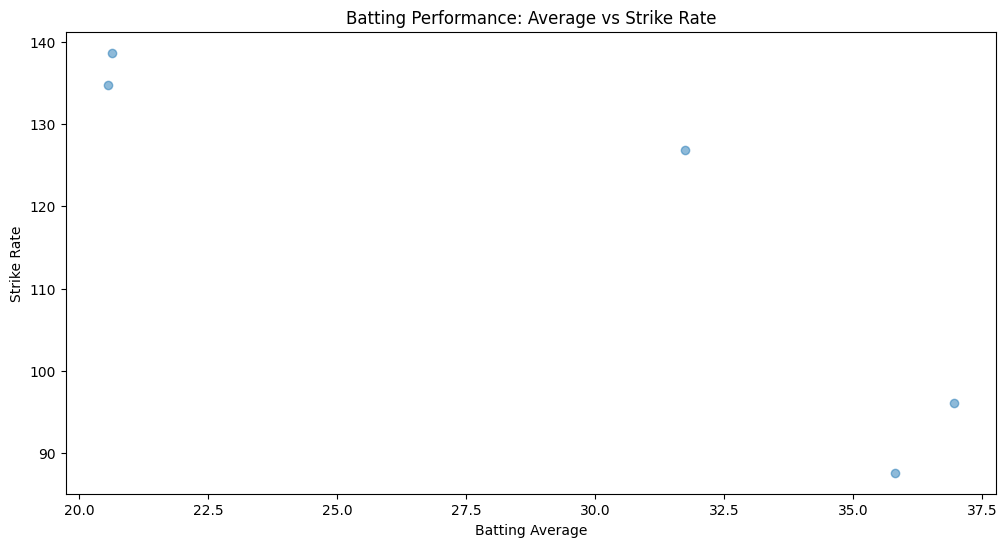

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Batting_Average'], df['Strike_Rate'], alpha=0.5)
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.title('Batting Performance: Average vs Strike Rate')
plt.show()

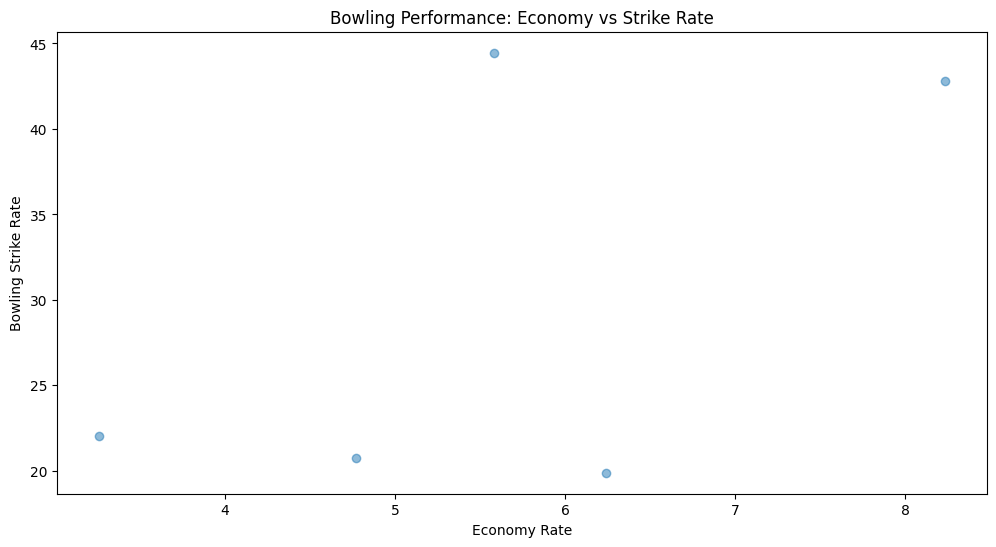

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Economy'], df['Bowling_Strike_Rate'], alpha=0.5)
plt.xlabel('Economy Rate')
plt.ylabel('Bowling Strike Rate')
plt.title('Bowling Performance: Economy vs Strike Rate')
plt.show()

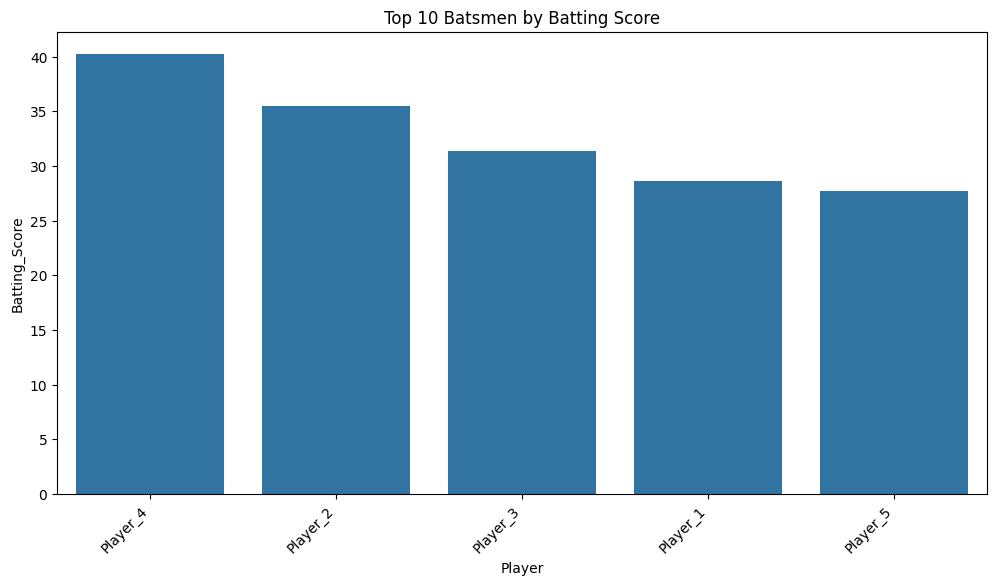

In [31]:
top_batsmen = df.nlargest(10, 'Batting_Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Batting_Score', data=top_batsmen)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Batsmen by Batting Score')
plt.show()

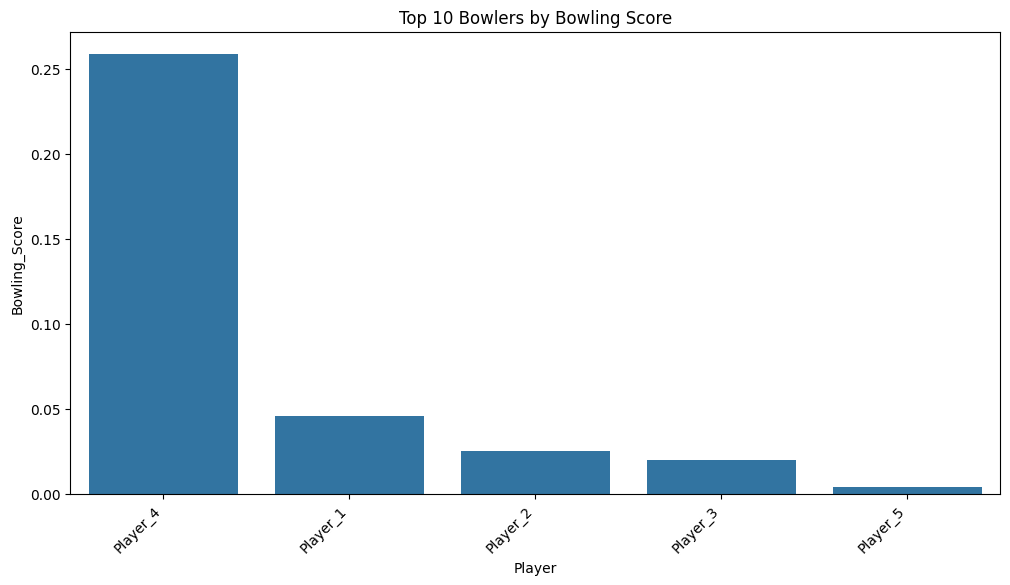

In [32]:
top_bowlers = df.nlargest(10, 'Bowling_Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Bowling_Score', data=top_bowlers)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Bowlers by Bowling Score')
plt.show()

In [33]:
features = ['Batting_Average', 'Strike_Rate', 'Boundary_Percentage', 'Economy', 'Bowling_Strike_Rate']

In [34]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])


In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

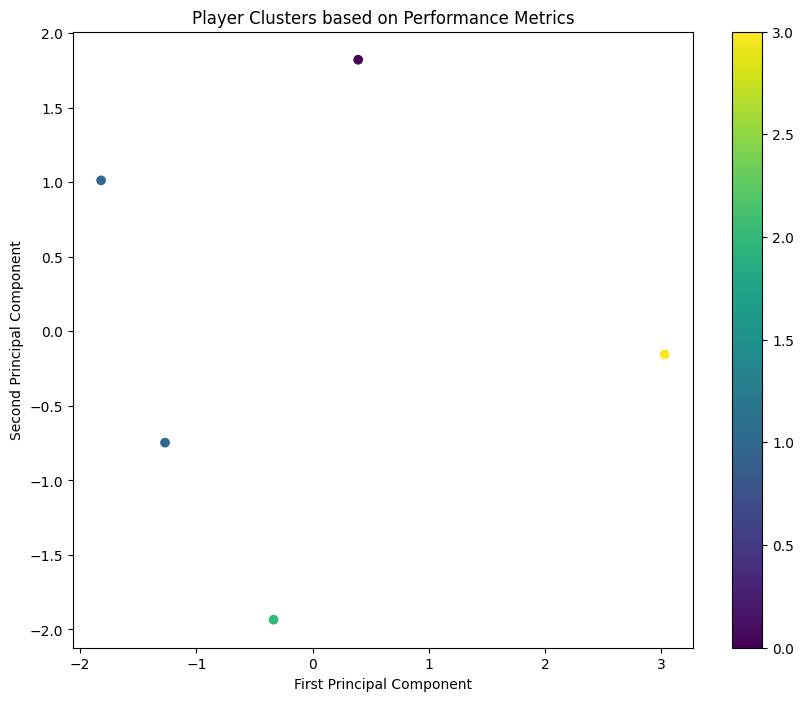

In [37]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Player Clusters based on Performance Metrics')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

In [42]:
def select_playing_xi(df):
    # Select top 6 batsmen
    batsmen = df.nlargest(6, 'Batting_Score')
    
    # Select top 4 bowlers
    bowlers = df[~df.index.isin(batsmen.index)].nlargest(4, 'Bowling_Score')
    
    # Select 1 all-rounder (high on both batting and bowling scores)
    all_rounders = df[~df.index.isin(batsmen.index) & ~df.index.isin(bowlers.index)]
    all_rounder = all_rounders.nlargest(1, ['Batting_Score', 'Bowling_Score'])
    
    # Combine the selections
    playing_xi = pd.concat([batsmen, bowlers, all_rounder])
    
    return playing_xi

In [43]:
optimal_xi = select_playing_xi(df)

print("\nOptimal Playing XI for ICC Champions Trophy:")
print(optimal_xi[['Player', 'Batting_Score', 'Bowling_Score']])


Optimal Playing XI for ICC Champions Trophy:
     Player  Batting_Score  Bowling_Score
3  Player_4      40.274886       0.258819
1  Player_2      35.491952       0.025186
2  Player_3      31.367960       0.019800
0  Player_1      28.607621       0.045546
4  Player_5      27.706656       0.004227


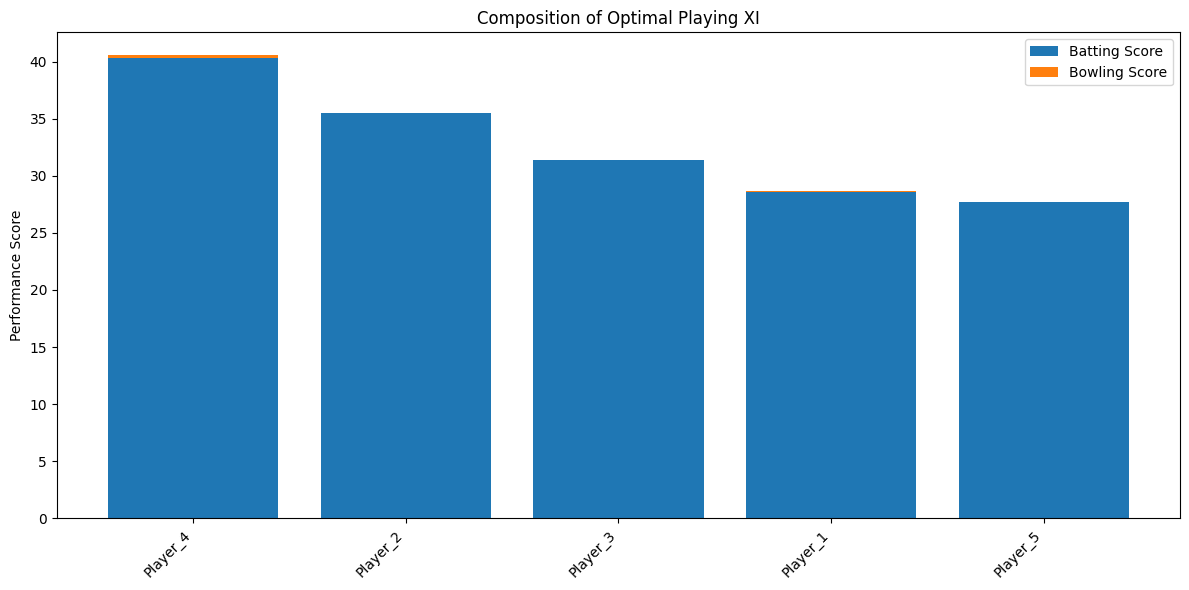

In [44]:
plt.figure(figsize=(12, 6))
plt.bar(optimal_xi['Player'], optimal_xi['Batting_Score'], label='Batting Score')
plt.bar(optimal_xi['Player'], optimal_xi['Bowling_Score'], bottom=optimal_xi['Batting_Score'], label='Bowling Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Performance Score')
plt.title('Composition of Optimal Playing XI')
plt.legend()
plt.tight_layout()
plt.show()